## Modules Import

In [4]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For train test split
from sklearn.model_selection import train_test_split

# For linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# For random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix


## Loading Datasets

In [6]:
# Load the data 
order_data_path = 'Raw Data/order_july24.csv'
new_customer_data_path = 'Raw Data/new_customer24.csv'
# Update with your file path
order_data = pd.read_csv(order_data_path)
new_customer_data = pd.read_csv(new_customer_data_path)


## Pre Processing

In [10]:
# 1. Handling Missing Values
print("Missing Values Before Handling:")
print(order_data.isnull().sum())

# Fill numerical missing values with the median
numerical_columns = ['past_spend', 'age', 'time_web', 'spend']
for col in numerical_columns:
    order_data[col] = order_data[col].fillna(order_data[col].median())

# Fill categorical missing values with the mode
categorical_columns = ['ad_channel', 'voucher']
for col in categorical_columns:
    order_data[col] = order_data[col].fillna(order_data[col].mode()[0])

print("\nMissing Values After Handling:")
print(order_data.isnull().sum())

Missing Values Before Handling:
past_spend    25
age           14
ad_channel    16
time_web      21
voucher       24
spend         27
dtype: int64

Missing Values After Handling:
past_spend    0
age           0
ad_channel    0
time_web      0
voucher       0
spend         0
dtype: int64


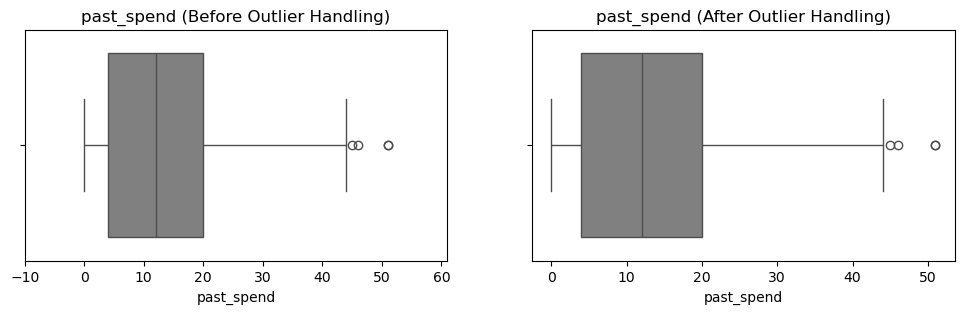

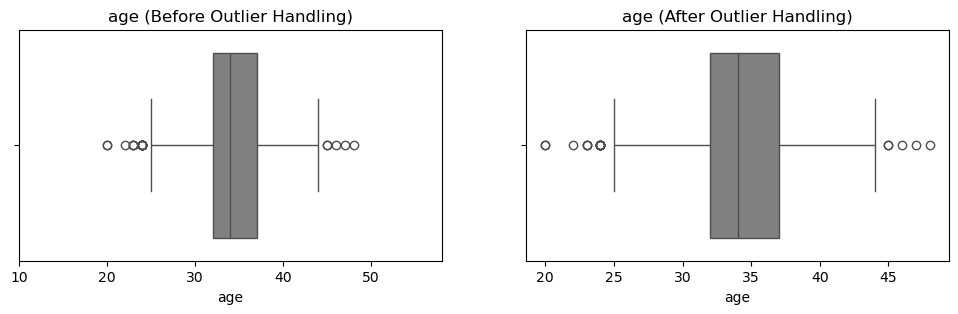

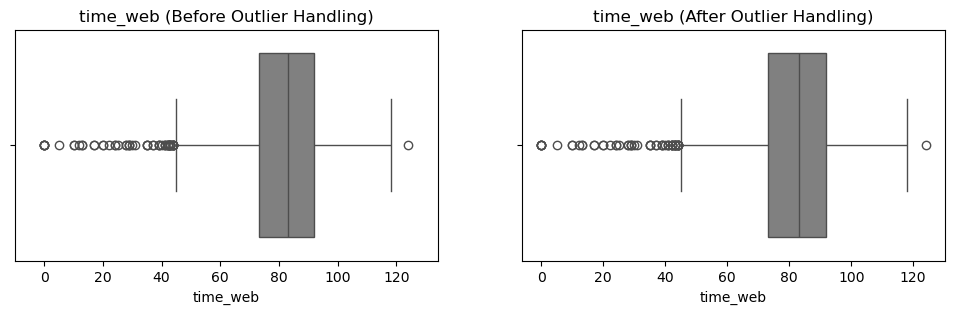

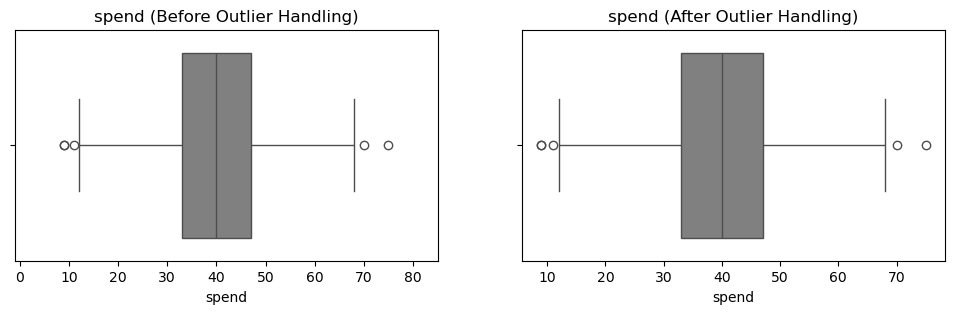

In [43]:
# Step 2: Create a copy of the data before outlier handling
order_data_before_outlier_handling = order_data.copy()
order_data_after_outlier_handling = order_data.copy()

# Handle outliers by capping them at the 5th and 95th percentiles
for col in numerical_columns:
    lower_limit = order_data[col].quantile(0.05)
    upper_limit = order_data[col].quantile(0.95)
    order_data_after_outlier_handling[col] = order_data_after_outlier_handling[col].clip(lower=lower_limit, upper=upper_limit)

# Step 3: Generate parallel boxplots (Pre and Post Outlier Handling)
for col in numerical_columns:
    plt.figure(figsize=(12, 3))

    # Create subplots
    plt.subplot(1, 2, 1)
    sns.boxplot(x=order_data_before_outlier_handling[col], color = 'grey')
    plt.title(f'{col} (Before Outlier Handling)')
    plt.xlabel(col)
    
    # Adjust axis to better visualize the outliers
    plt.xlim(order_data_before_outlier_handling[col].min()-10, order_data_before_outlier_handling[col].max()+10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=order_data[col], color = 'grey')
    plt.title(f'{col} (After Outlier Handling)')
    plt.xlabel(col)

    # plt.tight_layout()
    plt.show()

## Correlation Analysis


Correlation Matrix:
            past_spend       age  ad_channel  time_web   voucher     spend
past_spend    1.000000  0.003589    0.026508  0.003790 -0.004815  0.385756
age           0.003589  1.000000    0.023175  0.032830  0.021093  0.615962
ad_channel    0.026508  0.023175    1.000000  0.003048 -0.040138  0.033241
time_web      0.003790  0.032830    0.003048  1.000000  0.019996  0.591056
voucher      -0.004815  0.021093   -0.040138  0.019996  1.000000  0.025691
spend         0.385756  0.615962    0.033241  0.591056  0.025691  1.000000


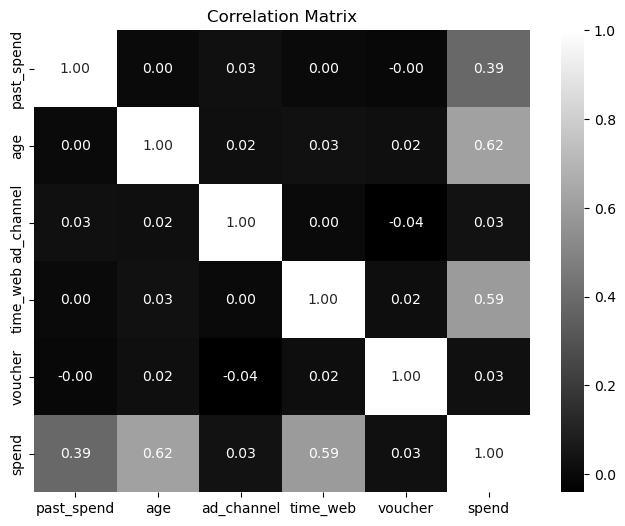

In [39]:
# 2. Correlation Analysis
correlations = order_data.corr()
print("\nCorrelation Matrix:")
print(correlations)

# Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='grey', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [17]:
# 3. Summary Statistics
print("\nSummary Statistics:")
print(order_data.describe())


Summary Statistics:
        past_spend          age   ad_channel    time_web      voucher  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean     13.007000    34.139000     2.410500    81.23200     0.229500   
std      10.426855     3.958095     1.079153    16.50592     0.420616   
min       0.000000    20.000000     1.000000     0.00000     0.000000   
25%       4.000000    32.000000     1.000000    73.00000     0.000000   
50%      12.000000    34.000000     2.000000    83.00000     0.000000   
75%      20.000000    37.000000     3.000000    92.00000     0.000000   
max      51.000000    48.000000     4.000000   124.00000     1.000000   

             spend  
count  2000.000000  
mean     40.144500  
std       9.752855  
min       9.000000  
25%      33.000000  
50%      40.000000  
75%      47.000000  
max      75.000000  


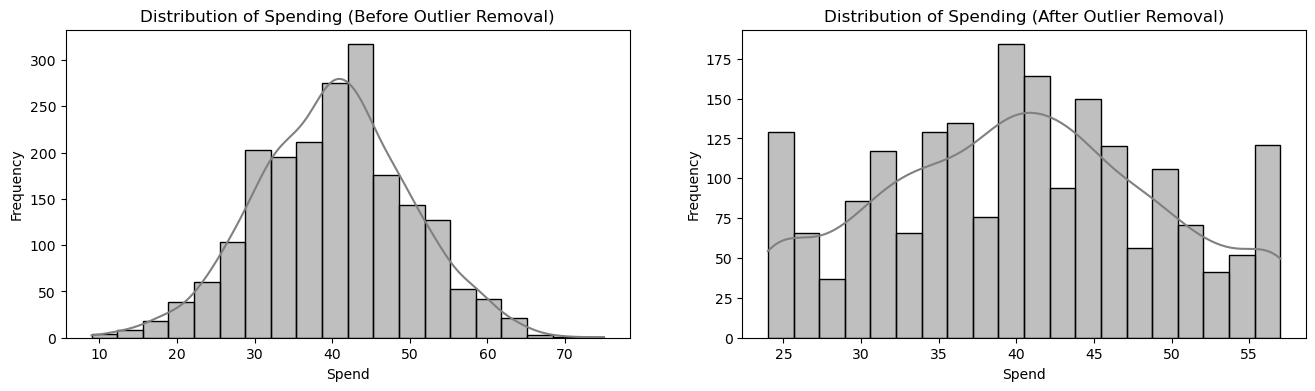

/var/folders/6_/lnnlyvg97bv1fbtwyqqth9z80000gn/T/ipykernel_4180/4128477133.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


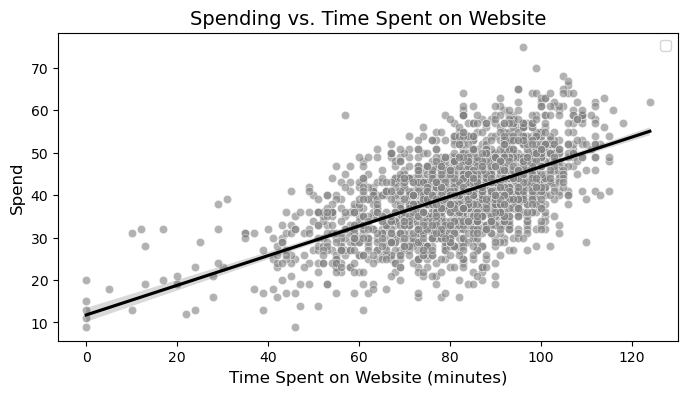

/var/folders/6_/lnnlyvg97bv1fbtwyqqth9z80000gn/T/ipykernel_4180/4128477133.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


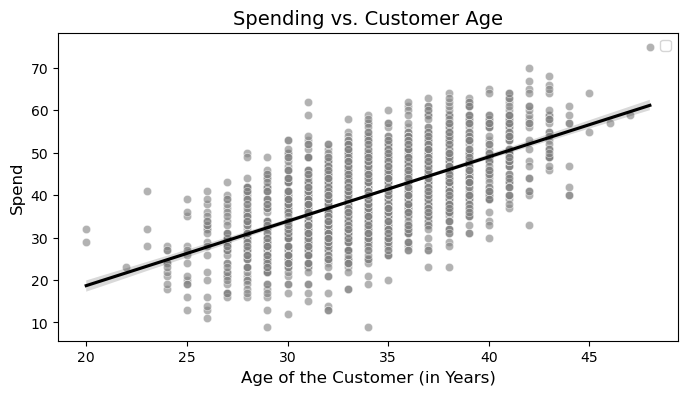

/var/folders/6_/lnnlyvg97bv1fbtwyqqth9z80000gn/T/ipykernel_4180/4128477133.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


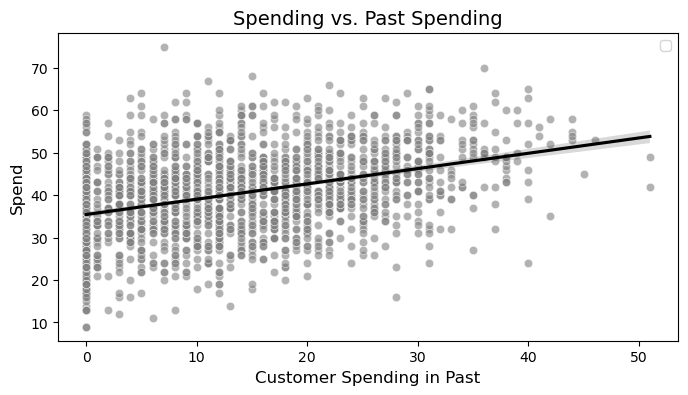

In [80]:
# 4. Analyzing Spending Patterns

# Distribution of spend
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.histplot(order_data['spend'], bins=20, kde=True, color='grey')
plt.title("Distribution of Spending (Before Outlier Removal)")
plt.xlabel("Spend")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(order_data_after_outlier_handling['spend'], bins=20, kde=True, color='grey')
plt.title("Distribution of Spending (After Outlier Removal)")
plt.xlabel("Spend")
plt.ylabel("Frequency")
plt.show()

# Spending vs. Time on Website
plt.figure(figsize=(8, 4))
sns.scatterplot(x='time_web', y='spend', data=order_data, color='grey', alpha=0.6)
sns.regplot(x='time_web', y='spend', data=order_data, scatter=False, color='black', line_kws={'label': 'Trend Line'})
plt.title("Spending vs. Time Spent on Website", fontsize=14)
plt.xlabel("Time Spent on Website (minutes)", fontsize=12)
plt.ylabel("Spend", fontsize=12)
plt.legend()
plt.show()

# Spending by Age
# Spending vs. Time on Website
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='spend', data=order_data, color='grey', alpha=0.6)
sns.regplot(x='age', y='spend', data=order_data, scatter=False, color='black', line_kws={'label': 'Trend Line'})
plt.title("Spending vs. Customer Age", fontsize=14)
plt.xlabel("Age of the Customer (in Years)", fontsize=12)
plt.ylabel("Spend", fontsize=12)
plt.legend()
plt.show()



# Spending by Age
# Spending vs. Time on Website
plt.figure(figsize=(8, 4))
sns.scatterplot(x='past_spend', y='spend', data=order_data, color='grey', alpha=0.6)
sns.regplot(x='past_spend', y='spend', data=order_data, scatter=False, color='black', line_kws={'label': 'Trend Line'})
plt.title("Spending vs. Past Spending", fontsize=14)
plt.xlabel("Customer Spending in Past", fontsize=12)
plt.ylabel("Spend", fontsize=12)
plt.legend()
plt.show()



## Label Encoder for Categorical variables

In [52]:
# Encode categorical variables
label_encoder = LabelEncoder()
order_data['ad_channel'] = label_encoder.fit_transform(order_data['ad_channel'])
order_data['voucher'] = order_data['voucher'].astype(int)  # Ensure it's an integer

## Running Linear regression

In [55]:
# Step 7: Define Features and Target Variable
X = order_data[['past_spend', 'age', 'time_web']]
y = order_data['spend']

In [57]:
# Step 8: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [59]:
# Step 9: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Step 10: Evaluate the Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 2.91
Root Mean Squared Error (RMSE): 3.76
R-squared (R2): 0.85


In [63]:
# Step 11: Predict Spend for New Customers
# Preprocess new customer data (similar to training data)
new_customer_data['past_spend'].fillna(order_data['past_spend'].median(), inplace=True)
new_customer_data['age'].fillna(order_data['age'].median(), inplace=True)
new_customer_data['time_web'].fillna(order_data['time_web'].median(), inplace=True)
new_customer_data['voucher'].fillna(order_data['voucher'].mode()[0], inplace=True)
new_customer_data['ad_channel'] = label_encoder.transform(new_customer_data['ad_channel'])

/var/folders/6_/lnnlyvg97bv1fbtwyqqth9z80000gn/T/ipykernel_4180/1234129406.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_customer_data['past_spend'].fillna(order_data['past_spend'].median(), inplace=True)
/var/folders/6_/lnnlyvg97bv1fbtwyqqth9z80000gn/T/ipykernel_4180/1234129406.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate objec

### Checking for over and under fitting

In [66]:
# Check for overfitting or underfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Training R-squared (R²): {train_score:.2f}")
print(f"Testing R-squared (R²): {test_score:.2f}")

# Compare Training and Test Performance
if train_score > test_score + 0.1:
    print("The model might be overfitting to the training data.")
elif train_score < 0.5 and test_score < 0.5:
    print("The model might be underfitting. Consider improving the features or model.")
else:
    print("The model has a good balance of bias and variance.")


Model Performance:
Training R-squared (R²): 0.85
Testing R-squared (R²): 0.85
The model has a good balance of bias and variance.


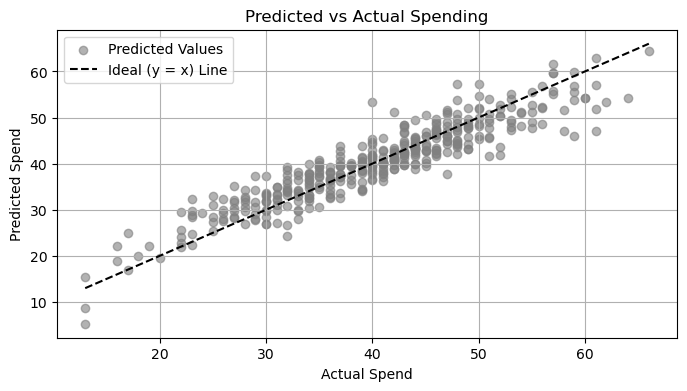

In [70]:
# Predicted vs Actual Plot with Legends
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='grey', alpha=0.6, label="Predicted Values")  # Add legend for data points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Ideal (y = x) Line")  # Add legend for ideal line
plt.title("Predicted vs Actual Spending")
plt.xlabel("Actual Spend")
plt.ylabel("Predicted Spend")
plt.grid(True)
plt.legend()  # Add legend
plt.show()

## Prediction based on the Linear Regression Model

In [117]:
# Predict spending for new customers
X_new = new_customer_data[['past_spend', 'age', 'ad_channel', 'time_web', 'voucher']]
new_customer_data['predicted_spend'] = model.predict(X_new)

# Show predictions
print("\nPredicted Spending for New Customers:")
print(new_customer_data[['past_spend', 'age', 'ad_channel', 'time_web', 'voucher', 'predicted_spend']])


Predicted Spending for New Customers:
    past_spend  age  ad_channel  time_web  voucher  predicted_spend
0            2   29           0        47        0        16.547163
1           16   36           0        85        0        45.086052
2            9   40           1        78        1        46.375579
3            2   38           0        95        0        46.618413
4           20   33           2        63        0        34.407704
5           12   33           1       100        0        44.658632
6           25   34           0        90        0        47.105836
7           28   42           2        73        0        53.842099
8           19   35           3       103        0        51.149898
9           10   29           3        73        0        28.650861
10          33   31           3       101        1        49.913931
11           3   23           1        94        1        25.208581
12          11   35           0        72        0        37.277120
13       

In [119]:
# Optionally save the predictions to a new CSV
output_path = 'predicted_new_customer_spend.csv'
new_customer_data.to_csv(output_path, index=False)
print(f"\nPredictions saved to: {output_path}")


Predictions saved to: predicted_new_customer_spend.csv
